<br>

<div align="right" style="font-family: Arial, sans-serif; font-size: 14px; color: #333;">
    <strong>Réalisé par :</strong> ADUAYOM MESSAN Daniel  
</div>
<div align="right" style="font-family: Arial, sans-serif; font-size: 14px; color: #333;">
    <strong>Date :</strong> Octobre 2024
</div>

<br><br>

<div align="center">
    <span style="font-family: Georgia, serif; font-size: 30px; color: darkgreen;">
        PROJET DE DATA ANALYTICS
    </span>
</div>

<div align="center">
    <span style="font-family: Georgia, serif; font-size: 24px; color: #cc0000;">
        Analyse Factorielle Discriminante des Universités Françaises
    </span>
</div>

<hr style="border: 2px solid #75DFC1;">

<center>
    <h1 style="color: #444;">Étude des Similarités entre Universités</h1>
</center>

<hr style="border: 2px solid #75DFC1;">

> Ce projet s’inscrit dans une démarche d’analyse exploratoire de données sur l’insertion professionnelle des diplômés de Master en France. À travers une **Analyse Factorielle Discriminante (AFD)**, il vise à :
>
> - Comprendre les **facteurs influençant l’insertion professionnelle** selon les établissements,
> - Identifier des **profils d’universités similaires**,
> - Fournir des **indicateurs utiles aux étudiants, aux décideurs et aux établissements eux-mêmes**.
>
> L’étude repose sur des données fournies par le Ministère de l’Enseignement Supérieur (MENESR), récoltées 30 mois après l’obtention des diplômes.

<br><br>


In [2]:
# Import necessary libraries
import pandas as pd
from IPython.display import display #to display DataFrames in Jupyter notebooks
import numpy as np #for numerical operations

<br/>
<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Présentation de la Base de Données</h1></center>
<hr style="border-width:2px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette base de données provient d'une enquête nationale menée par le Ministère de l’Enseignement Supérieur sur l’insertion professionnelle des diplômés de Master. Elle couvre près de 60 000 diplômés interrogés 30 mois après l’obtention de leur diplôme. Les données permettent d’analyser les performances d’insertion par université et fournissent de nombreux indicateurs socio-économiques.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>taux_dinsertion :</strong> Pourcentage de diplômés en emploi parmi ceux présents sur le marché du travail.</li>
    <li><strong>salaire_net_median_des_emplois_a_temps_plein :</strong> Salaire mensuel net médian des diplômés en emploi à temps plein.</li>
    <li><strong>emplois_stables :</strong> Part des emplois à durée indéterminée ou statut de fonctionnaire.</li>
    <li><strong>emplois_cadre_ou_professions_intermediaires :</strong> Part des emplois de niveau cadre ou intermédiaire.</li>
    <li><strong>femmes :</strong> Pourcentage de femmes parmi les diplômés.</li>
    <li><strong>de_diplomes_boursiers :</strong> Part des diplômés ayant bénéficié d’une bourse durant leurs études.</li>
    <li><strong>emplois_exterieurs_a_la_region_de_luniversite :</strong> Part des diplômés travaillant hors de leur région universitaire.</li>
    <li><strong>taux_de_chomage_regional :</strong> Taux de chômage dans la région de l’université (source INSEE).</li>
    <li><strong>salaire_net_mensuel_median_regional :</strong> Salaire médian régional des jeunes cadres ou professions intermédiaires.</li>
    <li><strong>nombre_de_reponses :</strong> Nombre total de diplômés ayant répondu à l’enquête pour chaque université.</li>
    <li><strong>taux_de_reponse :</strong> Pourcentage de répondants à l’enquête pour chaque établissement.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Ces indicateurs permettent une analyse comparative des universités françaises selon leurs résultats en matière d’insertion professionnelle. Cette base offre ainsi une opportunité précieuse pour explorer les proximités et différences entre établissements, et guider étudiants, chercheurs ou décideurs.
</p>


In [13]:
# Define the file path
file_path = 'Data/fr-esr-insertion_professionnelle-master.csv'

# Read the CSV file
# Note: The separator is set to ";" as per the original code
data = pd.read_csv(file_path,sep=";")

# Display the first few rows of the DataFrame
print("Aperçu de notre base de données")
display(data.head())

# dtype of the DataFrame
print("Type de données de notre base de données")
display(data.dtypes)


Aperçu de notre base de données


,annee,diplome,numero_de_l_etablissement,etablissement,etablissementactuel,code_de_l_academie,academie,code_du_domaine,domaine,code_de_la_discipline,...,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile,cle_etab,cle_disc,id_paysage
0,2017,MASTER LMD,0751719L,Paris 3 - Sorbonne Nouvelle,NaN,A01,Paris,LLA,"Lettres, langues, arts",disc06,...,7.1,2120,46,35,89,1620,2620,Paris 3 - Sorbonne Nouvelle_18,disc06_18,8k883
1,2017,MASTER LMD,0751719L,Paris 3 - Sorbonne Nouvelle,NaN,A01,Paris,LLA,"Lettres, langues, arts",disc06,...,7.1,2120,57,35,89,1620,2620,Paris 3 - Sorbonne Nouvelle_30,disc06_30,8k883
2,2017,MASTER ENS,0755890V,Sorbonne Université,NaN,A01,Paris,MEEF,Masters enseignement,disc18,...,7.1,2120,96,6,86,1620,2620,Sorbonne Université_30,disc18_30,bxPQe
3,2017,MASTER LMD,0755890V,Sorbonne Université,NaN,A01,Paris,DEG,"Droit, économie et gestion",disc01,...,7.1,2120,ns,ns,ns,1620,2620,Sorbonne Université_30,disc01_30,bxPQe
4,2017,MASTER LMD,0755890V,Sorbonne Université,NaN,A01,Paris,STS,"Sciences, technologies et santé",disc16,...,7.1,2120,93,15,9,1620,2620,Sorbonne Université_18,disc16_18,bxPQe


Type de données de notre base de données


annee                                              int64
diplome                                           object
numero_de_l_etablissement                         object
etablissement                                     object
etablissementactuel                               object
code_de_l_academie                                object
academie                                          object
code_du_domaine                                   object
domaine                                           object
code_de_la_discipline                             object
discipline                                        object
situation                                         object
remarque                                          object
nombre_de_reponses                               float64
taux_de_reponse                                   object
poids_de_la_discipline                            object
taux_dinsertion                                   object
taux_d_emploi                  

In [14]:
# list of variables continues
# Note: The original code had a typo in the variable name 'taux_dinsertion' (missing underscore)
variables_continues = [
    'taux_de_reponse', 'poids_de_la_discipline', 'taux_dinsertion',
    'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
    'emplois_a_temps_plein', 'salaire_brut_annuel_estime', 'taux_de_chomage_regional'
]
# Check for missing values in the DataFrame
for col in variables_continues:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # convert to numeric, coercing errors to NaN

# select only that we need
colonnes_used = ['diplome', 'etablissement', 'discipline', 'situation'] + variables_continues
data = data[colonnes_used]
# Describe the DataFrame to get summary statistics
# Note: The describe() method provides summary statistics for numerical columns by default
print("Statistique descriptive")
display(data.describe())
# Save the DataFrame to a CSV file for further analysis
data.to_csv("Data/Used_Data.csv", index=False)

# dimension of the DataFrame
print("Dimensions de notre base de données")
display((data.shape))



Statistique descriptive


,taux_de_reponse,poids_de_la_discipline,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_brut_annuel_estime,taux_de_chomage_regional
count,19268.000000,18765.000000,10856.000000,9816.000000,9935.000000,9869.000000,8442.000000,19136.000000
mean,71.720262,18.367226,89.815494,87.272107,70.363664,92.566116,29874.034589,8.740782
std,13.875942,23.357322,6.665734,10.588858,16.161273,8.969819,3974.184381,1.996428
min,0.000000,0.000000,6.000000,3.000000,12.000000,37.000000,20000.000000,5.700000
25%,64.000000,4.000000,86.000000,82.000000,59.000000,90.000000,26800.000000,7.400000
50%,73.000000,9.000000,91.000000,90.000000,72.000000,96.000000,29600.000000,8.600000
75%,81.000000,22.000000,95.000000,95.000000,83.000000,98.000000,32400.000000,9.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,49100.000000,20.100000


Dimensions de notre base de données


(19603, 12)

<hr style="border-width:2px;border-color:#75DFC1"> <center><h1>Analyse Statistique – Interprétation des Résultats</h1></center> <hr style="border-width:2px;border-color:#75DFC1"> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> L’analyse des indicateurs permet de dresser un état des lieux sur la qualité des parcours de formation et leur débouché professionnel. Chaque indicateur apporte un éclairage complémentaire sur les dynamiques observées dans la base de données. </p> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> Le <strong>taux de réponse</strong> atteint en moyenne 71,7 %, avec une forte variabilité : certaines formations recueillent 100 % de réponses, tandis que d’autres sont à zéro. Cette hétérogénéité appelle à un examen des méthodes de collecte utilisées, notamment pour les formations sans retour. </p> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> Concernant le <strong>poids des disciplines</strong>, la moyenne est de 18,4 %, mais la médiane chute à 9 %, ce qui indique que seules quelques disciplines concentrent l’essentiel des effectifs. Cette tendance traduit une forte polarisation autour de certains domaines d’études. </p> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> Le <strong>taux d’insertion professionnelle</strong> est élevé, à 89,8 % en moyenne, avec un écart-type faible (6,7), traduisant une relative homogénéité entre formations. Ce bon niveau d'insertion peut être interprété comme le résultat d’ajustements récents du système éducatif aux besoins du marché. </p> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> Les <strong>emplois qualifiés</strong> représentent en moyenne 87,3 % des situations professionnelles, avec des écarts très larges (de 3 % à 100 %). Cette proportion reflète la montée en qualification de l’emploi, mais aussi une inflation des exigences de diplôme pour des postes de niveau intermédiaire. </p> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> En revanche, la <strong>stabilité de l’emploi</strong> semble plus fragile : elle atteint en moyenne 70,4 %, avec un premier quartile à 59 %, ce qui signale une précarité non négligeable. Ce constat renvoie à une hausse des contrats courts, en particulier pour les jeunes diplômés. </p> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> Le <strong>salaire brut annuel</strong> moyen s’établit à 29 874 €, mais les valeurs observées varient fortement entre 20 000 € et 49 100 €. Cette amplitude traduit des écarts sectoriels importants, bien que les niveaux moyens restent en cohérence avec les salaires d’entrée dans la vie active. </p> <p style="font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;"> Enfin, le <strong>taux de chômage régional</strong> présente une moyenne de 8,7 %, oscillant entre 5,7 % et 20,1 % selon les territoires. Ces disparités régionales restent marquées, même si elles sont alignées avec les données nationales. </p> <div style="margin-top:20px; padding:15px; border-radius:8px; border-left:4px solid #2ecc71; font-family:'Arial', sans-serif; font-size: 14px;"> <strong>🔎 Points de Vigilance :</strong><br> Les données relatives aux salaires sont partiellement renseignées (8 442 observations sur 19 945), limitant certaines analyses. La stabilité de l’emploi demeure le point le plus fragile de cette étude. Un croisement avec les secteurs d’activité permettrait d’affiner l’interprétation et d’identifier plus précisément les leviers d’action. </div> <div style="margin-top:15px; font-size:0.9em; text-align:right; font-family:'Arial', sans-serif;"> <i>Analyse réalisée sur la base de 19603 observations – 2017 a 2020</i> </div>

<div style="font-family: 'Arial', sans-serif; font-size: 14px; margin-top: 20px;"> <h3 style="color: #75DFC1;">Préparation des Variables pour l’Analyse Discriminante</h3>
<p style="line-height: 1.6;">
Afin de nous inscrire dans le cadre méthodologique proposé dans le cours de Ricco Rakotomalala, nous adoptons une démarche de transformation des variables continues en variables discrètes. Cette étape est indispensable pour rendre les données compatibles avec une Analyse Factorielle Discriminante, qui nécessite une structure catégorielle sur certaines dimensions.
</p>

<p style="line-height: 1.6;">
Nous avons choisi d’utiliser une méthode de <strong>discrétisation en quantiles</strong>, consistant à découper les variables en classes contenant un effectif similaire d’individus. Par défaut, une division en quartiles produit quatre groupes équilibrés, mais il est également possible d'opter pour une division en déciles (dix classes) afin d'obtenir une granularité plus fine.
</p>

<p style="line-height: 1.6;"><strong>✔️ Avantages de la discrétisation en quantiles :</strong></p>
<ul style="margin-top: -10px; line-height: 1.6;">
    <li>Facilité de mise en œuvre et d’interprétation.</li>
    <li>Répartition équilibrée des effectifs entre les classes.</li>
    <li>Réduction de l'influence des valeurs extrêmes et des outliers.</li>
    <li>Approche non paramétrique ne nécessitant aucune hypothèse sur la distribution des données.</li>
</ul>

<p style="line-height: 1.6;"><strong>⚠️ Limites de cette approche :</strong></p>
<ul style="margin-top: -10px; line-height: 1.6;">
    <li>Découpage purement statistique sans prise en compte de la signification métier ou contextuelle.</li>
    <li>Classes parfois artificielles ou peu interprétables si la distribution est irrégulière.</li>
    <li>Risque de perte d'information si la discrétisation est trop fine ou mal adaptée au nombre d’observations.</li>
    <li>Stabilité des classes sensible aux variations de l’échantillon.</li>
</ul>

<p style="line-height: 1.6;">
Cette étape de discrétisation constitue donc un compromis entre la simplification des variables et la préservation de leur capacité à discriminer efficacement les groupes.
</p>


In [5]:
# Créer des catégories basées sur les quartiles
for col in variables_continues:
    data[f'{col}_categorie'] = pd.qcut(data[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Sélectionner les colonnes catégorielles et les nouvelles catégories
colonnes_categorielles = ['diplome', 'etablissement', 'discipline', 'situation'] + [f'{col}_categorie' for col in variables_continues]
data_categorise = data[colonnes_categorielles]

data_categorise = data_categorise.dropna()

# Afficher un aperçu des données catégorisées
display(data_categorise.head())

,diplome,etablissement,discipline,situation,taux_de_reponse_categorie,poids_de_la_discipline_categorie,taux_dinsertion_categorie,emplois_cadre_ou_professions_intermediaires_categorie,emplois_stables_categorie,emplois_a_temps_plein_categorie,salaire_brut_annuel_estime_categorie,taux_de_chomage_regional_categorie
0,MASTER LMD,Paris 3 - Sorbonne Nouvelle,"Lettres, langues, arts",18 mois après le diplôme,Q1,Q4,Q3,Q1,Q1,Q1,Q1,Q1
1,MASTER LMD,Paris 3 - Sorbonne Nouvelle,"Lettres, langues, arts",30 mois après le diplôme,Q1,Q4,Q2,Q1,Q2,Q1,Q2,Q1
2,MASTER ENS,Sorbonne Université,Masters enseignement,30 mois après le diplôme,Q1,Q4,Q4,Q4,Q4,Q2,Q2,Q1
4,MASTER LMD,Sorbonne Université,Informatique,18 mois après le diplôme,Q1,Q3,Q4,Q3,Q4,Q4,Q4,Q1
5,MASTER LMD,Sorbonne Université,"Autres sciences, technologies et santé",18 mois après le diplôme,Q1,Q3,Q4,Q4,Q3,Q4,Q4,Q1


In [15]:
import pandas as pd

# Supposons que 'variables_continues' est votre liste de colonnes numériques
variables_continues = [
    'taux_de_reponse', 'poids_de_la_discipline', 'taux_dinsertion',
    'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
    'emplois_a_temps_plein', 'salaire_brut_annuel_estime', 'taux_de_chomage_regional'
]

# Créer les catégories basées sur les quartiles
for col in variables_continues:
    data[f'{col}_categorie'] = pd.qcut(data[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Fonction pour calculer les statistiques par quantile
def analyse_quantiles(data, variable):
    stats = data.groupby(f'{variable}_categorie')[variable].agg(
        ['count', 'mean', 'median', 'min', 'max']
    ).rename(columns={
        'count': 'Nombre d\'observations',
        'mean': 'Moyenne',
        'median': 'Médiane',
        'min': 'Minimum',
        'max': 'Maximum'
    })
    return stats

# Afficher les statistiques pour chaque variable
for col in variables_continues:
    print(f"\n🔍 Statistiques pour {col} par quantile:")
    display(analyse_quantiles(data, col))


🔍 Statistiques pour taux_de_reponse par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
taux_de_reponse_categorie,,,,,
Q1,4873,53.436487,56.0,0.0,64.0
Q2,5015,69.332203,69.0,65.0,73.0
Q3,4997,77.320392,77.0,74.0,81.0
Q4,4383,88.395848,87.0,82.0,100.0



🔍 Statistiques pour poids_de_la_discipline par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
poids_de_la_discipline_categorie,,,,,
Q1,4818,2.452262,2.0,0.0,4.0
Q2,4713,6.720985,7.0,5.0,9.0
Q3,4578,14.565531,14.0,10.0,22.0
Q4,4656,50.362758,39.0,23.0,100.0



🔍 Statistiques pour taux_dinsertion par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
taux_dinsertion_categorie,,,,,
Q1,2888,81.087258,83.0,6.0,86.0
Q2,3024,89.212632,89.0,87.0,91.0
Q3,2825,93.461239,93.0,92.0,95.0
Q4,2119,97.711185,97.0,96.0,100.0



🔍 Statistiques pour emplois_cadre_ou_professions_intermediaires par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
emplois_cadre_ou_professions_intermediaires_categorie,,,,,
Q1,2670,72.992509,75.0,3.0,82.0
Q2,2383,86.851448,87.0,83.0,90.0
Q3,2412,93.103648,93.0,91.0,95.0
Q4,2351,97.932795,98.0,96.0,100.0



🔍 Statistiques pour emplois_stables par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
emplois_stables_categorie,,,,,
Q1,2526,48.480602,50.0,12.0,59.0
Q2,2532,66.251185,66.0,60.0,72.0
Q3,2521,78.137644,78.0,73.0,83.0
Q4,2356,89.926995,89.0,84.0,100.0



🔍 Statistiques pour emplois_a_temps_plein par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
emplois_a_temps_plein_categorie,,,,,
Q1,2593,80.428461,83.0,37.0,90.0
Q2,2718,94.030537,94.0,91.0,96.0
Q3,2286,97.548119,98.0,97.0,98.0
Q4,2272,99.654049,100.0,99.0,100.0



🔍 Statistiques pour salaire_brut_annuel_estime par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
salaire_brut_annuel_estime_categorie,,,,,
Q1,2137,25228.404305,25400.0,20000.0,26800.0
Q2,2309,28326.634907,28100.0,26900.0,29600.0
Q3,1892,31057.505285,31200.0,29700.0,32400.0
Q4,2104,35226.473384,34300.0,32500.0,49100.0



🔍 Statistiques pour taux_de_chomage_regional par quantile:


C:\Users\daniel.messan_primel\AppData\Local\Temp\ipykernel_22908\2443139234.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(f'{variable}_categorie')[variable].agg(


,Nombre d'observations,Moyenne,Médiane,Minimum,Maximum
taux_de_chomage_regional_categorie,,,,,
Q1,5050,6.769861,6.9,5.7,7.4
Q2,5082,8.042582,8.0,7.5,8.6
Q3,4382,9.016043,9.0,8.7,9.5
Q4,4622,11.400930,10.9,9.6,20.1


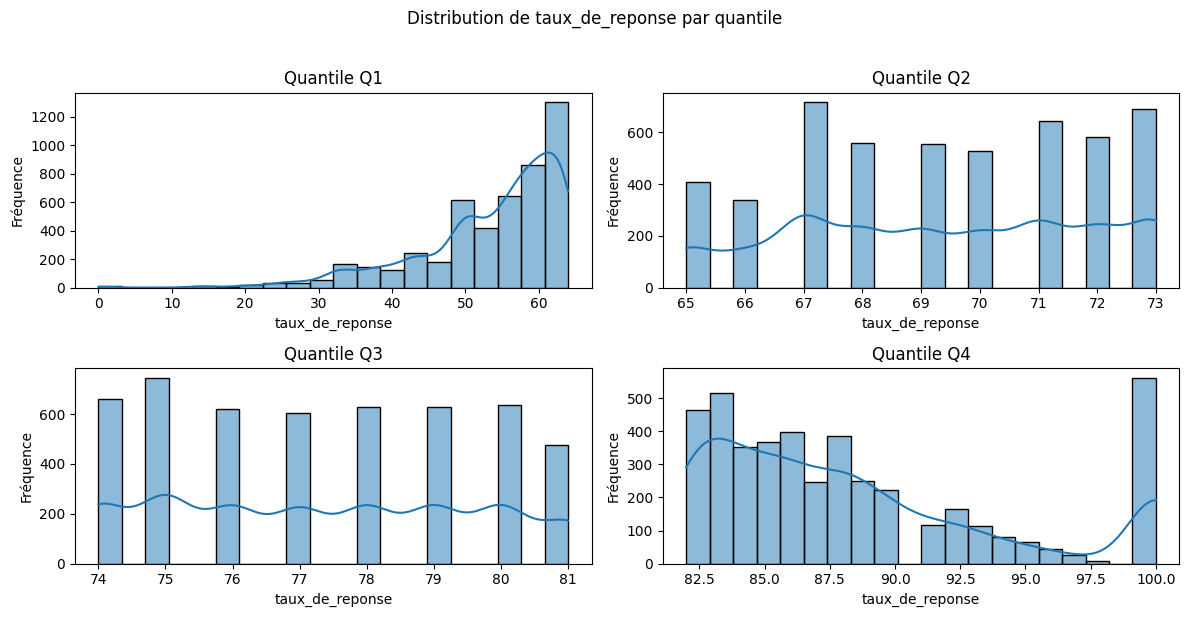

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_continues = [
    'taux_de_reponse', 'poids_de_la_discipline', 'taux_dinsertion',
    'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
    'emplois_a_temps_plein', 'salaire_brut_annuel_estime', 'taux_de_chomage_regional'
]

for col in ["taux_de_reponse"]:
    plt.figure(figsize=(12, 6))
    
    # Créer un sous-graphique pour chaque quantile
    for i, q in enumerate(['Q1', 'Q2', 'Q3', 'Q4'], 1):
        plt.subplot(2, 2, i)
        subset = data[data[f'{col}_categorie'] == q]
        sns.histplot(subset[col], kde=True, bins=20)
        plt.title(f'Quantile {q}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
    
    plt.suptitle(f'Distribution de {col} par quantile', y=1.02)
    plt.tight_layout()
    plt.show()

<div style="font-family: 'Arial', sans-serif; font-size: 14px; margin-top: 20px;"> <h3 style="color: #75DFC1;">Transformation des Variables Catégorielles : One-Hot Encoding</h3>
<p style="line-height: 1.6;">
Dans le prolongement de la phase de préparation des données, nous appliquons une transformation des variables catégorielles par <strong>encodage binaire (one-hot encoding)</strong>. Cette méthode consiste à convertir chaque modalité d’une variable qualitative en une nouvelle variable binaire (0 ou 1), indiquant la présence ou l’absence de cette modalité pour chaque individu.
</p>

<p style="line-height: 1.6;"><strong>✔️ Intérêt du one-hot encoding dans notre contexte :</strong></p>
<ul style="margin-top: -10px; line-height: 1.6;">
    <li>Permet d’intégrer des variables qualitatives dans une analyse factorielle à orientation géométrique, comme l’AFD.</li>
    <li>Préserve l'information contenue dans les catégories sans leur imposer d’ordre artificiel.</li>
    <li>Assure la compatibilité avec les calculs matriciels nécessaires à l’analyse discriminante.</li>
    <li>Facilite la lecture et l’interprétation des contributions par modalité.</li>
</ul>

<p style="line-height: 1.6;">
Cette étape est indispensable pour garantir une représentation fidèle des variables qualitatives dans l’espace factoriel, tout en respectant les contraintes structurelles de l’analyse discriminante.
</p>


In [6]:
# Specify the columns to be one-hot encoded
colonnes_a_encoder = [col for col in colonnes_categorielles if col != 'etablissement']

# Apply one-hot encoding to the specified columns
data_encoded = pd.get_dummies(data_categorise, columns=colonnes_a_encoder, prefix_sep='_')
# Convert the encoded DataFrame to integer type to have binary values (0 and 1)
# Note: This step is optional, as get_dummies already creates binary columns
for col in data_encoded.columns:
    if data_encoded[col].dtype not in [np.int64, np.float64, 'bool']:
        print(f"Attention : La colonne '{col}' contient des valeurs non numériques et ne peut pas être convertie en entier.")

# Si vous voulez convertir uniquement les colonnes booléennes en entiers (0 et 1)
data_encoded = data_encoded.astype({col: int for col in data_encoded.select_dtypes(include=['bool']).columns})

# Afficher un aperçu des données encodées après correction
display(data_encoded.head())


Attention : La colonne 'etablissement' contient des valeurs non numériques et ne peut pas être convertie en entier.


,etablissement,diplome_MASTER ENS,diplome_MASTER LMD,"discipline_Autres formations juridiques, économiques et de gestion",discipline_Autres sciences humaines et sociales,"discipline_Autres sciences, technologies et santé",discipline_Droit,"discipline_Ensemble formations juridiques, économiques et de gestion",discipline_Ensemble sciences humaines et sociales,"discipline_Ensemble sciences, technologies et santé",...,emplois_a_temps_plein_categorie_Q3,emplois_a_temps_plein_categorie_Q4,salaire_brut_annuel_estime_categorie_Q1,salaire_brut_annuel_estime_categorie_Q2,salaire_brut_annuel_estime_categorie_Q3,salaire_brut_annuel_estime_categorie_Q4,taux_de_chomage_regional_categorie_Q1,taux_de_chomage_regional_categorie_Q2,taux_de_chomage_regional_categorie_Q3,taux_de_chomage_regional_categorie_Q4
0,Paris 3 - Sorbonne Nouvelle,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,Paris 3 - Sorbonne Nouvelle,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,Sorbonne Université,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,Sorbonne Université,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5,Sorbonne Université,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


<div style="font-family: 'Arial', sans-serif; font-size: 14px; margin-top: 20px;"> <h3 style="color: #75DFC1;">Construction du Tableau de Contingence</h3>
<p style="line-height: 1.6;">
À la suite du one-hot encoding, nous construisons un <strong>tableau de contingence</strong> entre les <strong>modalités des variables explicatives</strong> (issues de la discrétisation ou du codage binaire) et la <strong>variable cible</strong> (groupe ou classe à prédire dans l’AFD). 
</p>

<p style="line-height: 1.6;">
Un tableau de contingence est une matrice qui croise deux variables qualitatives en comptabilisant les effectifs pour chaque combinaison de modalités. Dans notre cas, il s’agit de compter combien d’individus appartenant à chaque classe (variable cible) présentent une certaine modalité d’une variable explicative.
</p>

<p style="line-height: 1.6;"><strong>✔️ Objectifs et intérêts du tableau de contingence :</strong></p>
<ul style="margin-top: -10px; line-height: 1.6;">
    <li>Fournir une base de calcul pour l’Analyse Factorielle Discriminante, en représentant la distribution des modalités par groupe.</li>
    <li>Permettre d’évaluer la relation entre chaque modalité et les différentes classes de la variable à expliquer.</li>
    <li>Préparer les données sous une forme directement exploitable pour la construction de l’espace factoriel.</li>
</ul>

<p style="line-height: 1.6;">
Ce tableau représente donc une étape intermédiaire mais essentielle, reliant les variables explicatives transformées à la structure des groupes cibles, et constituant l’entrée principale de l’AFD.
</p>


In [11]:
# Group by 'etablissement' and sum all columns
grouped_data = data_encoded.groupby('etablissement').sum()

# Display the resulting DataFrame
display(grouped_data.head())

grouped_data['Total'] = grouped_data.sum(axis=1)  # Total ligne
grouped_data.loc['Total'] = grouped_data.sum()     # Total colonne

# Save the DataFrame to a CSV file for further analysis
grouped_data.to_csv("Data/contingency_table.csv")

,diplome_MASTER ENS,diplome_MASTER LMD,"discipline_Autres formations juridiques, économiques et de gestion",discipline_Autres sciences humaines et sociales,"discipline_Autres sciences, technologies et santé",discipline_Droit,"discipline_Ensemble formations juridiques, économiques et de gestion",discipline_Ensemble sciences humaines et sociales,"discipline_Ensemble sciences, technologies et santé",discipline_Gestion,...,emplois_a_temps_plein_categorie_Q3,emplois_a_temps_plein_categorie_Q4,salaire_brut_annuel_estime_categorie_Q1,salaire_brut_annuel_estime_categorie_Q2,salaire_brut_annuel_estime_categorie_Q3,salaire_brut_annuel_estime_categorie_Q4,taux_de_chomage_regional_categorie_Q1,taux_de_chomage_regional_categorie_Q2,taux_de_chomage_regional_categorie_Q3,taux_de_chomage_regional_categorie_Q4
etablissement,,,,,,,,,,,,,,,,,,,,,
Aix-Marseille,21,282,2,20,20,20,20,20,20,20,...,57,30,99,86,63,55,0,60,62,181
Amiens - Picardie Jules-Verne,19,117,0,1,6,2,19,19,19,8,...,41,32,35,47,29,25,0,0,48,88
Angers,8,144,4,9,11,0,20,20,20,20,...,29,35,86,43,17,6,88,24,40,0
Antilles,6,2,0,0,0,0,2,0,0,0,...,1,2,0,1,2,5,0,0,0,8
Artois,9,78,6,0,0,0,20,3,19,8,...,20,31,23,17,30,17,0,0,25,62


In [10]:
grouped_data

,diplome_MASTER ENS,diplome_MASTER LMD,"discipline_Autres formations juridiques, économiques et de gestion",discipline_Autres sciences humaines et sociales,"discipline_Autres sciences, technologies et santé",discipline_Droit,"discipline_Ensemble formations juridiques, économiques et de gestion",discipline_Ensemble sciences humaines et sociales,"discipline_Ensemble sciences, technologies et santé",discipline_Gestion,...,emplois_a_temps_plein_categorie_Q4,salaire_brut_annuel_estime_categorie_Q1,salaire_brut_annuel_estime_categorie_Q2,salaire_brut_annuel_estime_categorie_Q3,salaire_brut_annuel_estime_categorie_Q4,taux_de_chomage_regional_categorie_Q1,taux_de_chomage_regional_categorie_Q2,taux_de_chomage_regional_categorie_Q3,taux_de_chomage_regional_categorie_Q4,Total
etablissement,,,,,,,,,,,,,,,,,,,,,
Aix-Marseille,21,282,2,20,20,20,20,20,20,20,...,30,99,86,63,55,0,60,62,181,3333
Amiens - Picardie Jules-Verne,19,117,0,1,6,2,19,19,19,8,...,32,35,47,29,25,0,0,48,88,1496
Angers,8,144,4,9,11,0,20,20,20,20,...,35,86,43,17,6,88,24,40,0,1672
Antilles,6,2,0,0,0,0,2,0,0,0,...,2,0,1,2,5,0,0,0,8,88
Artois,9,78,6,0,0,0,20,3,19,8,...,31,23,17,30,17,0,0,25,62,957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Université Sorbonne Paris Nord,0,51,0,1,0,0,17,16,0,6,...,11,10,13,7,21,14,22,15,0,561
Université de Paris,4,84,0,8,6,8,8,8,8,7,...,17,2,18,14,54,67,21,0,0,968
Versailles Saint-Quentin-en-Yvelines,1,86,2,0,0,4,20,7,16,19,...,43,2,4,29,52,25,37,25,0,957


<div style="font-family: 'Arial', sans-serif; font-size: 14px; margin-top: 20px;">
  <h3 style="color: #75DFC1;">🎓 1. Massification de l’enseignement supérieur</h3>
  <p>
    Le nombre élevé de diplômes MASTER LMD délivrés dans la majorité des universités (ex : Aix-Marseille, Angers) confirme la massification des études longues. 
    Cela s’aligne avec l’objectif de démocratisation de l’accès aux études supérieures, même si cette massification pose des questions sur l’adéquation entre le volume des diplômés et le marché de l’emploi.
  </p>

  <h3 style="color: #75DFC1;">🧑‍🔬 2. Concentration disciplinaire dans certaines filières</h3>
  <p>
    Une lecture transversale montre que les formations en sciences, technologies et santé (STS) et sciences humaines et sociales (SHS) sont largement représentées, 
    souvent de manière déséquilibrée selon les universités.
  </p>
  <p>
    Par exemple, certaines universités ont une forte concentration dans les SHS sans forte présence STS, ce qui peut poser des défis d’employabilité compte tenu des débouchés variables d’une discipline à l’autre.
  </p>
  <p>
    Cela interroge sur l’accompagnement à l’orientation, mais aussi sur la stratégie de spécialisation régionale des établissements.
  </p>

  <h3 style="color: #75DFC1;">💼 3. Insertion professionnelle inégale</h3>
  <p>
    Les colonnes relatives aux emplois à temps plein (Q4) montrent de fortes disparités. Certaines universités affichent de bons taux d’emploi alors que d'autres restent très en retrait.
  </p>
  <p>
    Par exemple, Aix-Marseille (30) et Angers (35) contrastent avec Antilles (2). Cela reflète à la fois l’attractivité économique des régions et peut-être aussi les réseaux professionnels des universités.
  </p>
  <p>
    Cela renvoie à la problématique de l’insertion professionnelle territorialisée : à diplôme équivalent, les perspectives d’emploi varient selon le bassin économique local.
  </p>

  <h3 style="color: #75DFC1;">💰 4. Salaires des jeunes diplômés : des écarts révélateurs</h3>
  <p>
    Des universités comme Aix-Marseille montrent une dispersion importante entre les différentes catégories de salaire (de Q1 à Q4).
  </p>
  <p>
    Cela montre que la valeur du diplôme est fortement dépendante du secteur, du type de diplôme, et du territoire. 
    On n’est pas sur une égalité de retour sur investissement entre les filières.
  </p>
  <p>
    Cette disparité est à rapprocher des revendications étudiantes récurrentes sur la précarité et le financement des études.
  </p>

  <h3 style="color: #75DFC1;">📉 5. Influence du chômage régional</h3>
  <p>
    Les catégories de taux de chômage régional associées aux diplômés permettent d’observer que certaines universités forment majoritairement dans des contextes socio-économiques moins favorables 
    (ex : forte présence dans Q3 ou Q4).
  </p>
  <p>
    C’est le cas par exemple pour Aix-Marseille (60+62+181 répartis sur Q2 à Q4), ce qui montre que même de grands pôles universitaires sont confrontés à des contextes difficiles.
  </p>
  <p>
    Cela invite à repenser le lien entre politique universitaire et politique territoriale : une formation de qualité ne suffit pas à elle seule à garantir l'emploi si le tissu économique local ne suit pas.
  </p>

  <h3 style="color: #75DFC1;">🧭 6. Quelques éléments transversaux à retenir</h3>
  <ul>
    <li>La quantité de diplômés ne garantit pas leur qualité d’insertion.</li>
    <li>Il y a une fracture géographique et disciplinaire dans les débouchés.</li>
    <li>Les universités situées dans des régions économiquement dynamiques (ex : grandes métropoles) offrent de meilleures perspectives.</li>
    <li>Un besoin se dessine : mieux articuler formations universitaires et débouchés économiques locaux.</li>
  </ul>
</div>


Analysons un peu le tableua de contingence 21/731 des master ens viennent de marseille 

pour marseille le master ens a été attribué à 21/3333  des reponses possibles